# Face recognition using Deep Learning(CNN)

### Reading the Images data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import re   
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
from random import shuffle
import os
import numpy as np
import pandas as pd

In [2]:
# Deep Learning CNN model to recognize face
TrainingImagePath = 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images'
TestingImagePath = 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images'

In [3]:
l = os.listdir(TrainingImagePath)
l

['face0',
 'face1',
 'face10',
 'face11',
 'face12',
 'face13',
 'face14',
 'face15',
 'face2',
 'face3',
 'face4',
 'face5',
 'face6',
 'face7',
 'face8',
 'face9']

## Data Processing

In [4]:
image_shape = []

for folder in os.listdir(TrainingImagePath):
    path = os.path.join(TrainingImagePath,folder)
    for face in os.listdir(path):
        file = os.path.join(path,face)
        img = imread(file, as_gray=True)
        image_shape.append(img.shape)
        print(f'image shape in height and width : {img.shape}')
        
print(f'max. image size : {max(image_shape)}, min. image size : {min(image_shape)}')
print(f'total number of images in training dataset : {len(image_shape)}')

image shape in height and width : (335, 335)
image shape in height and width : (326, 326)
image shape in height and width : (312, 312)
image shape in height and width : (296, 296)
image shape in height and width : (308, 308)
image shape in height and width : (332, 332)
image shape in height and width : (306, 306)
image shape in height and width : (274, 274)
image shape in height and width : (323, 323)
image shape in height and width : (313, 313)
image shape in height and width : (331, 331)
image shape in height and width : (334, 334)
image shape in height and width : (312, 312)
image shape in height and width : (323, 323)
image shape in height and width : (336, 336)
image shape in height and width : (297, 297)
image shape in height and width : (328, 328)
image shape in height and width : (319, 319)
image shape in height and width : (296, 296)
image shape in height and width : (287, 287)
image shape in height and width : (341, 341)
image shape in height and width : (300, 300)
image shap

image shape in height and width : (295, 295)
image shape in height and width : (304, 304)
image shape in height and width : (304, 304)
image shape in height and width : (316, 316)
image shape in height and width : (309, 309)
image shape in height and width : (283, 283)
image shape in height and width : (278, 278)
image shape in height and width : (316, 316)
image shape in height and width : (305, 305)
image shape in height and width : (317, 317)
image shape in height and width : (297, 297)
image shape in height and width : (313, 313)
image shape in height and width : (299, 299)
image shape in height and width : (317, 317)
image shape in height and width : (311, 311)
image shape in height and width : (304, 304)
image shape in height and width : (333, 333)
image shape in height and width : (353, 353)
image shape in height and width : (356, 356)
image shape in height and width : (338, 338)
image shape in height and width : (368, 368)
image shape in height and width : (357, 357)
image shap

In [5]:
p = []

for folder in os.listdir(TrainingImagePath):
    path = os.path.join(TrainingImagePath,folder)
    for face in os.listdir(path):
        file = os.path.join(path,face)
        p.append(file) 
print(p)

['E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face0\\image_0001_Face_1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face0\\image_0002_Face_2.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face0\\image_0003_Face_1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face0\\image_0004_Face_1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face0\\image_0005_Face_1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face0\\image_0006_Face_1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face0\\image_0007_Face_1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Imag

In [6]:
shuffle(p)

In [7]:
p

['E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face11\\image_0250_Face_1.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face10\\image_0237_Face_1.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face10\\image_0225_Face_1.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face4\\image_0055_Face_1.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face4\\image_0068_Face_1.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face11\\image_0248_Face_1.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Training Images\\face5\\image_0084_Face_1.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebook

In [8]:
y_train = []
img_arr = []

for face_path in p:
    img = imread(face_path, as_gray=True)
    img = resize(img, (249,249))
    text = face_path.split('\\')[-2]
    m = re.search('face(.+)', text).group(1)
    y_train.append(m)
    img_arr.append(img)  
    print(f'image shape in height and width : {img.shape}')
        
print(f'total number of images in training dataset : {len(img_arr)}')
print(f'total number of labels in training dataset : {len(y_train)}')

image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shap

image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shap

In [9]:
print(f'image height in pixels : {len(img_arr[0])}')
print(f'image width in pixels : {len(img_arr[1])}')

image height in pixels : 249
image width in pixels : 249


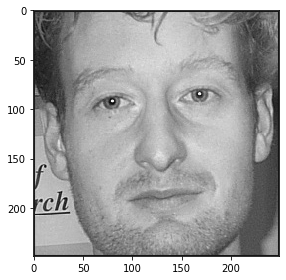

In [10]:
# First image in training dataset
imshow(img_arr[0]);

In [11]:
img_arr = np.array(img_arr)
y_train = np.array(y_train)

In [12]:
print(y_train.shape)
print(img_arr.shape)

(244,)
(244, 249, 249)


class label : 11


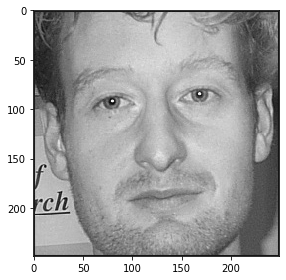

class label : 10


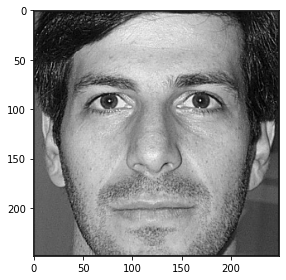

class label : 10


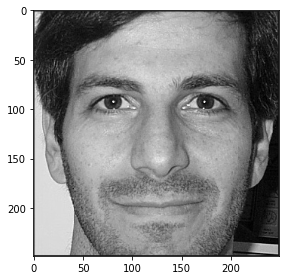

class label : 4


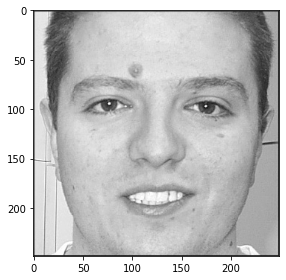

class label : 4


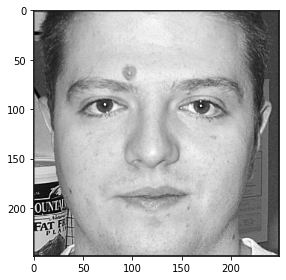

class label : 11


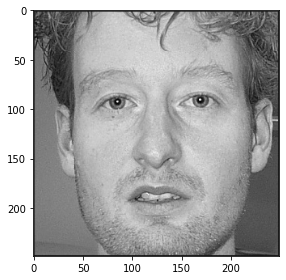

class label : 5


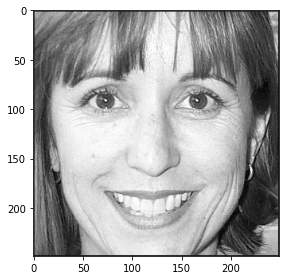

class label : 13


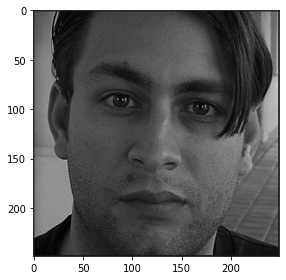

class label : 1


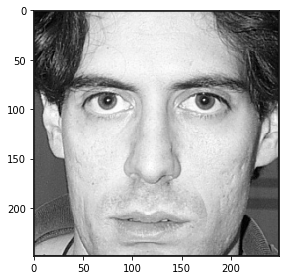

class label : 0


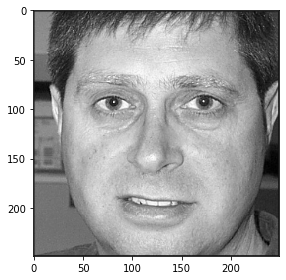

class label : 14


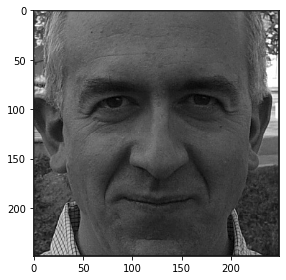

class label : 11


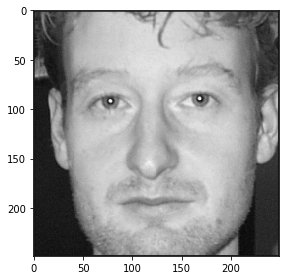

class label : 14


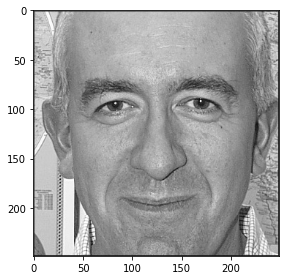

class label : 10


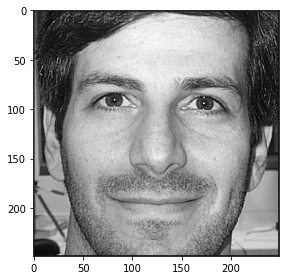

class label : 5


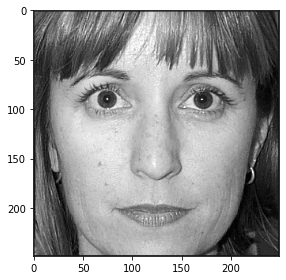

class label : 2


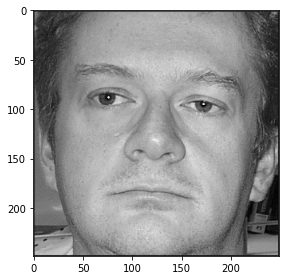

class label : 8


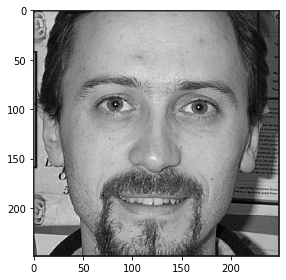

class label : 6


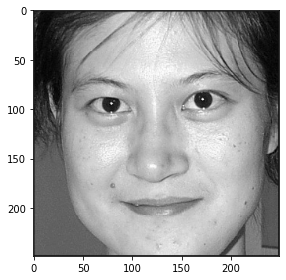

class label : 11


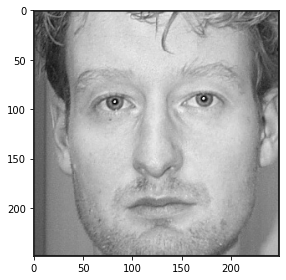

class label : 6


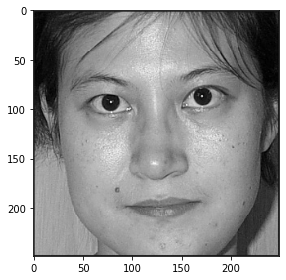

In [13]:
for i in range(20):
    print(f'class label : {y_train[i]}')
    imshow(img_arr[i])
    plt.show();

## Process Testing Image Data

In [14]:
image_shape = []

for folder in os.listdir(TestingImagePath):
    path = os.path.join(TestingImagePath,folder)
    for face in os.listdir(path):
        file = os.path.join(path,face)
        img = imread(file, as_gray=True)
        image_shape.append(img.shape)
        print(f'image shape in height and width : {img.shape}')
        
print(f'max. image size : {max(image_shape)}, min. image size : {min(image_shape)}')
print(f'total number of images in training dataset : {len(image_shape)}')

image shape in height and width : (335, 335)
image shape in height and width : (346, 346)
image shape in height and width : (287, 287)
image shape in height and width : (262, 262)
image shape in height and width : (310, 310)
image shape in height and width : (277, 277)
image shape in height and width : (313, 313)
image shape in height and width : (298, 298)
image shape in height and width : (350, 350)
image shape in height and width : (311, 311)
image shape in height and width : (313, 313)
image shape in height and width : (322, 322)
image shape in height and width : (310, 310)
image shape in height and width : (288, 288)
image shape in height and width : (288, 288)
image shape in height and width : (307, 307)
image shape in height and width : (310, 310)
image shape in height and width : (300, 300)
image shape in height and width : (329, 329)
image shape in height and width : (303, 303)
image shape in height and width : (341, 341)
image shape in height and width : (313, 313)
image shap

In [15]:
t = []

for folder in os.listdir(TestingImagePath):
    path = os.path.join(TestingImagePath,folder)
    for face in os.listdir(path):
        file = os.path.join(path,face)
        t.append(file)
        
print(t)

['E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face0\\1face1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face0\\2face1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face0\\3face1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face0\\4face1.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face1\\1face16.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face1\\2face16.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face1\\3face16.jpg', 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face1\\4face16.jpg', 'E:/Study Stuff/DataScience/Python/

In [16]:
shuffle(t)

In [17]:
t

['E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face15\\4face15.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face14\\3face14.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face15\\1face15.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face14\\1face14.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face5\\1face5.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face1\\3face16.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face15\\2face15.jpg',
 'E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/Face Images/Final Testing Images\\face0\\3face1.jpg',
 'E:/Study Stuff/Data

In [18]:
y_test = []
x_test = []

for face_path in t:
    img = imread(face_path, as_gray=True)
    img = resize(img, (249,249))
    text = face_path.split('\\')[-2]
    m = re.search('face(.+)', text).group(1)
    y_test.append(m)
    x_test.append(img)  
    print(f'image shape in height and width : {img.shape}')
        
print(f'total number of images in training dataset : {len(x_test)}')
print(f'total number of labels in training dataset : {len(y_test)}')

image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shape in height and width : (249, 249)
image shap

In [19]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
print(x_test.shape)
print(y_test.shape)

(64, 249, 249)
(64,)


class label : 15


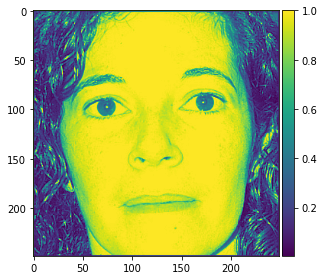

class label : 14


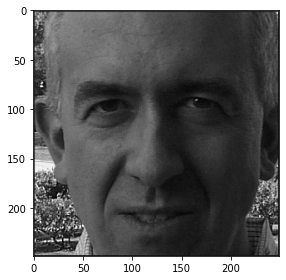

class label : 15


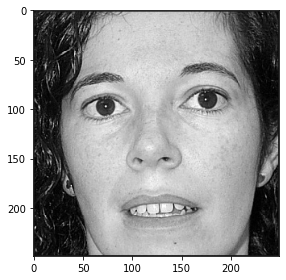

class label : 14


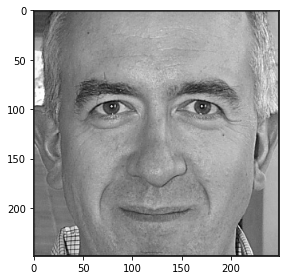

class label : 5


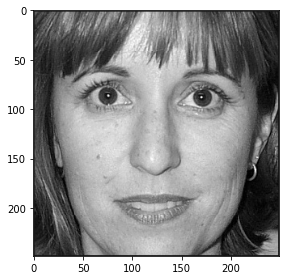

class label : 1


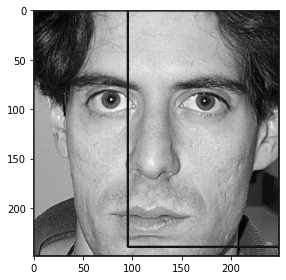

class label : 15


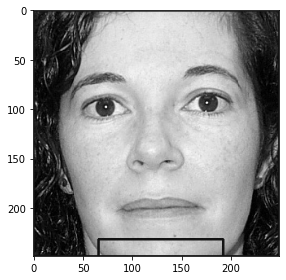

class label : 0


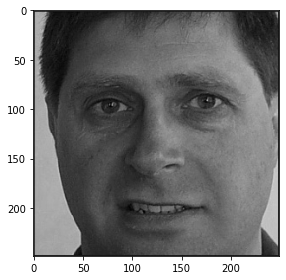

class label : 6


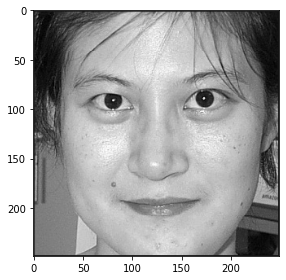

class label : 0


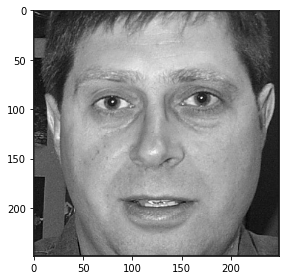

class label : 4


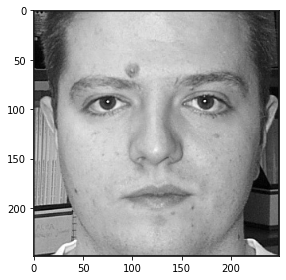

class label : 3


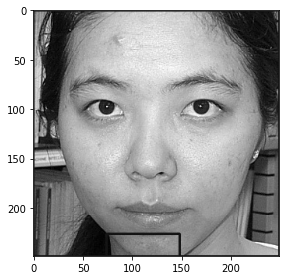

class label : 13


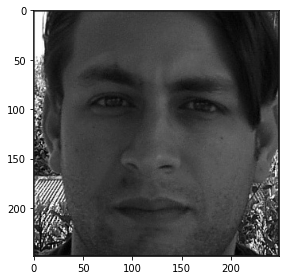

class label : 6


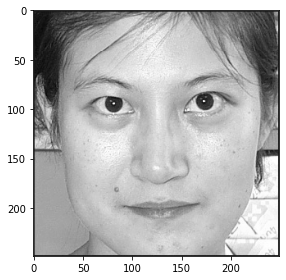

class label : 9


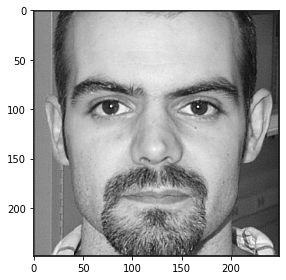

class label : 14


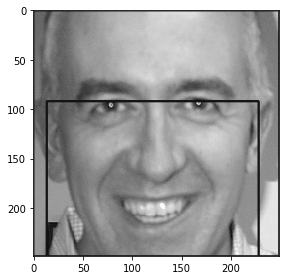

class label : 0


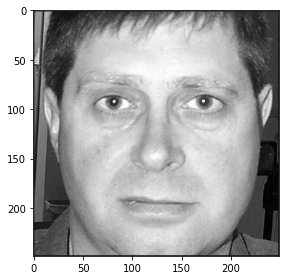

class label : 3


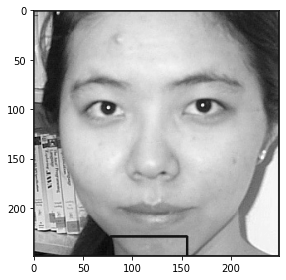

class label : 1


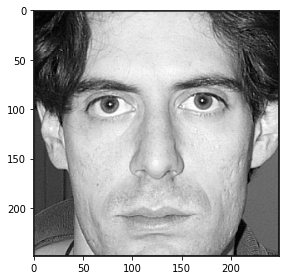

class label : 9


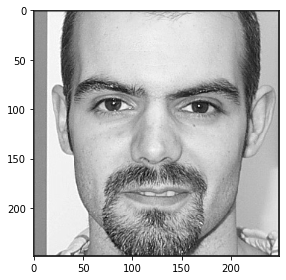

In [21]:
for i in range(20):
    print(f'class label : {y_test[i]}')
    imshow(x_test[i])
    plt.show();

In [22]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  16
Output classes :  ['0' '1' '10' '11' '12' '13' '14' '15' '2' '3' '4' '5' '6' '7' '8' '9']


Text(0.5, 0, 'classes')

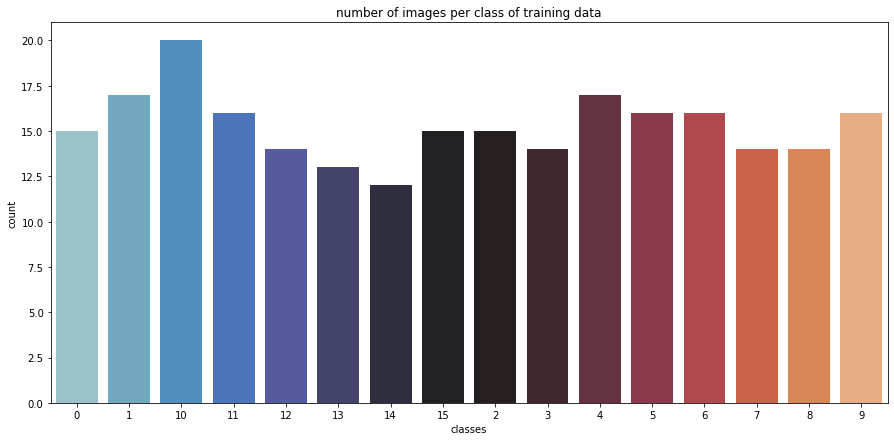

In [23]:
# visualize number of images per class
import seaborn as sns

plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("number of images per class of training data")
plt.xlabel("classes")

Text(0.5, 0, 'classes')

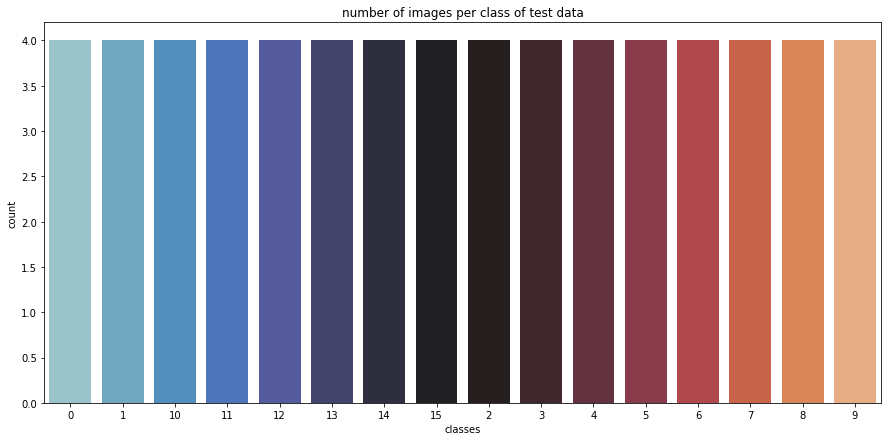

In [24]:
# visualize number of images per class
import seaborn as sns

plt.figure(figsize=(15,7))
g = sns.countplot(y_test, palette="icefire")
plt.title("number of images per class of test data")
plt.xlabel("classes")

In [25]:
# Reshape the predictor/input bcz CNN take 3D input
x_train = img_arr.reshape(-1, 249,249,1)
x_test = x_test.reshape(-1, 249,249,1)
x_train.shape, x_test.shape

((244, 249, 249, 1), (64, 249, 249, 1))

In [26]:
print(f'X_train dtype : "{x_train.dtype}" \nX_test dtype : "{x_test.dtype}"')

X_train dtype : "float64" 
X_test dtype : "float64"


In [27]:
# change dtype from float64 to float32
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

# Normalized the data
x_train = x_train / 255.
x_test = x_test / 255.

In [28]:
# Change the labels from categorical to one-hot encoding
# one-hot-encoding of target column, there are 10 unique classes in target column
# so there could be make 10 columns from 1 target column
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_cat[0],'\n')
print(f'Y_train_one_hot first 3 rows: \n{y_train_cat[:3]}\n')
print(f'Y_test_one_hot first 3 rows: \n{y_test_cat[:3]}')

Original label: 11
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 

Y_train_one_hot first 3 rows: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

Y_test_one_hot first 3 rows: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [29]:
# shape of newly created target data
y_train_cat.shape, y_test_cat.shape

((244, 16), (64, 16))

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x_train, y_train_cat, test_size=0.2, random_state=13)

In [31]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape", Y_train.shape)
print("y_test shape", Y_test.shape)

X_train shape (195, 249, 249, 1)
X_test shape (49, 249, 249, 1)
y_train shape (195, 16)
y_test shape (49, 16)


In [32]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape=(249,249,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 10, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(16, activation = "softmax"))

In [33]:
# Compile the model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 5  # for better result increase the epochs
batch_size = 128

In [34]:
# fit the model
history = model.fit(X_train,Y_train, batch_size=batch_size,epochs = epochs)

Epoch 1/5
2/2 [==============================] - 14s 7s/step - loss: 2.7720 - accuracy: 0.0667
Epoch 2/5
2/2 [==============================] - 5s 2s/step - loss: 2.7724 - accuracy: 0.0821
Epoch 3/5
2/2 [==============================] - 4s 2s/step - loss: 2.7715 - accuracy: 0.0872
Epoch 4/5
2/2 [==============================] - 4s 2s/step - loss: 2.7680 - accuracy: 0.0923
Epoch 5/5
2/2 [==============================] - 4s 2s/step - loss: 2.7681 - accuracy: 0.0769
